In [50]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [51]:
unitTime_in_Myrs = 0.48886 # Myrs
UnitDensity_in_cgs = 6.296e-20

In [52]:
jj = 140
#file = h5py.File('./output_Gad_65k_UNiFORM/snap_' + str(jj).zfill(3) +'.hdf5', 'r')
file = h5py.File('./output_Gad_65k_Nngb_64_eps_0.0001/snap_' + str(jj).zfill(3) +'.hdf5', 'r')

In [53]:
tStep = 0.005 # From Gadget parameter file.
currentTime = jj * tStep * unitTime_in_Myrs
print(f'currentTime = {round(currentTime, 3)} Myrs.')

currentTime = 0.342 Myrs.


In [54]:
file.keys()

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0']>

In [55]:
file['Parameters']

<HDF5 group "/Parameters" (0 members)>

In [56]:
file['PartType0'].keys()

<KeysViewHDF5 ['Coordinates', 'Density', 'InternalEnergy', 'Masses', 'ParticleIDs', 'SmoothingLength', 'Velocities']>

In [57]:
coord = file['PartType0']['Coordinates']
coord

<HDF5 dataset "Coordinates": shape (131504, 3), type "<f4">

In [58]:
vel = file['PartType0']['Velocities']
np.sort((vel[:, 0]))

array([-7.259847 , -7.2598376, -7.065833 , ...,  7.065766 ,  7.259845 ,
        7.259845 ], dtype=float32)

(-1.5, 1.5)

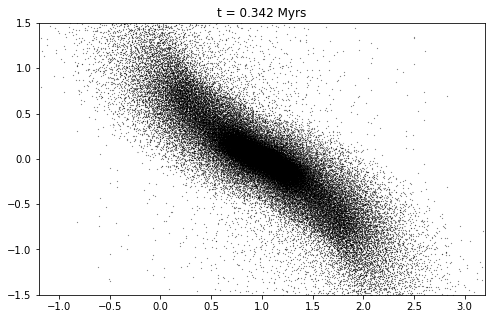

In [59]:
#with open('../Testing_Auto_timestep/Outputs_0.5_m_8k_my_code/00400.pkl', 'rb') as f:
#    data = pickle.load(f)
#    r = data['pos']

#j = 320
    
#print(r.shape)
plt.figure(figsize = (8, 5))
plt.scatter(coord[:, 0], coord[:, 1], s = 0.01, color = 'black')
#plt.plot(coord[j, 0], coord[j, 1], marker = 'o', color = 'red')
#plt.scatter(r[:, 0], r[:, 1], s = 0.02, color = 'blue')

# xyrange = 0.5
# plt.xlim(-xyrange, xyrange)
# plt.ylim(-xyrange, xyrange)

plt.title(f't = {round(currentTime, 3)} Myrs')

plt.xlim(-1.2, 3.2)
plt.ylim(-1.5, 1.5)

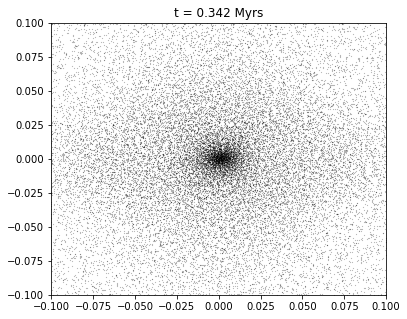

In [61]:
plt.figure(figsize = (6, 5))
plt.scatter(coord[:, 1], coord[:, 2], s = 0.01, color = 'black')

xyrange = 0.1
plt.xlim(-xyrange, xyrange)
plt.ylim(-xyrange, xyrange)
#plt.xlim(-0.02, 0.05)
#plt.ylim(-0.02, 0.03)
plt.title(f't = {round(currentTime, 3)} Myrs');


In [37]:
h = np.array(file['PartType0']['SmoothingLength'])

np.min(h), np.max(h), np.median(h)

(0.0033495554, 1.8525138, 0.076469645)

In [38]:
rho = np.array(list(file['PartType0']['Density']))
np.sort(rho) * UnitDensity_in_cgs

array([2.3687012e-24, 2.3687028e-24, 2.3687065e-24, ..., 3.8702976e-16,
       3.9165861e-16, 3.9198088e-16], dtype=float32)

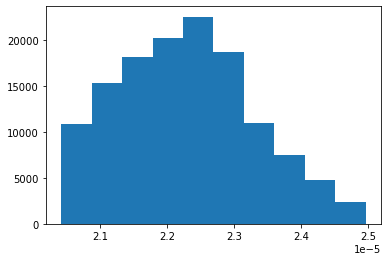

In [16]:
plt.hist(rho * (h/2.)**3);

In [17]:
u = file['PartType0']['InternalEnergy']
min(u), max(u), np.median(u)

(0.70313936, 2.2356799, 1.1094975)

In [18]:
m = np.array(file['PartType0']['Masses'])
np.sort(m)

array([1.5208663e-05, 1.5208663e-05, 1.5208663e-05, ..., 1.5208663e-05,
       1.5208663e-05, 1.5208663e-05], dtype=float32)

In [19]:
v = file['PartType0']['Velocities']
v

<HDF5 dataset "Velocities": shape (131504, 3), type "<f4">

In [20]:
ids = file['PartType0']['ParticleIDs']
ids

<HDF5 dataset "ParticleIDs": shape (131504,), type "<u4">

In [21]:
len(np.unique(list(ids)))

131504